In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
df = pd.read_csv('kijiji_car.csv')

In [2]:
df.replace('na',np.nan,inplace = True)

In [3]:
df

,Unnamed: 0,brand,model,model_year,list_price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,0,Hyundai,Santa Fe,2022,"$49,990",White,Ultimate Calligraphy,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,"5,489",https://www.carproof.com/order?ref=kijiji&vin=...,"506 Main St N, Brampton, ON, L6V 1P9"
1,1,BMW,X3,2018,"$32,980",Black,XDrive30i Sports Activity Vehicle,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,"112,079",https://www.carproof.com/order?ref=kijiji&vin=...,"2555 Steeles Avenue West, North York, ON, M3J 2P1"
2,2,GMC,Sierra 1500,2018,"$38,990",Black,SLE,Used,Pickup Truck,4 x 4,Automatic,Gasoline,"102,122",https://www.carproof.com/order?ref=kijiji&vin=...,"2115 Lawrence Avenue East, Scarborough, ON, M1..."
3,3,Nissan,Rogue,2016,"$17,895",White,S AWD,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,"140,781",https://www.carproof.com/order?ref=kijiji&vin=...,NaN
4,4,Ford,Other,2018,"$35,988",Other,E-350 14Ft Box - 6.2L V8 Gas - Side Door,Used,"Minivan, Van",Rear-wheel drive (RWD),Automatic,Gasoline,"163,000",NaN,"80 Toro Road, Toronto, ON, M3J 2A8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,1898,Infiniti,G37x,2010,"$6,500",NaN,NaN,Used,Sedan,NaN,NaN,NaN,"177,000",NaN,NaN
1899,1899,Honda,Accord,2015,"$18,999",Black,EX-L V6 Coupe AT NAVI LEATHER SUNROOF Camera,Used,Coupe (2 door),Front-wheel drive (FWD),Automatic,Gasoline,"152,250",NaN,"17 Tangiers Road, North York, ON, M3J 2B1"
1900,1900,Ford,F-250,2013,"$22,999",White,Extended Cab Short Box 4WD,Used,Pickup Truck,4 x 4,Automatic,Gasoline,"190,458",NaN,NaN
1901,1901,Dodge,Challenger,2018,"$54,777",Purple,R/T 392 6.4L SRT T/A PKG 485HP |BREMBO|HARMAN,Used,Coupe (2 door),Rear-wheel drive (RWD),Automatic,Gasoline,"39,200",https://www.carproof.com/order?ref=kijiji&vin=...,NaN


## Data Cleaning

In [4]:
# droping unnamed,carfax_link,dealer_address and configuration column as there is no realtionship betwen feature and target variable
df = df.drop(['Unnamed: 0','carfax_link','dealer_address','configration','condition'],axis = 1)

In [5]:
df.isnull().sum()

brand             6
model             6
model_year        6
list_price       24
color           204
body_type         6
wheel_config    240
transmission    173
fuel_type       186
mileage          36
dtype: int64

In [6]:
# Dropping Missing Values
df.dropna(subset = ['brand', 'model', 'model_year', 'list_price','wheel_config','transmission','fuel_type','mileage'], inplace=True)

In [7]:
# dealing with list_price datatype
df['list_price'] = df['list_price'].str.replace(r'\D', '').astype(int)
df['list_price']

C:\Users\patel\AppData\Local\Temp\ipykernel_10660\4177125979.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['list_price'] = df['list_price'].str.replace(r'\D', '').astype(int)


0       49990
1       32980
2       38990
3       17895
4       35988
        ...  
1897    10990
1899    18999
1900    22999
1901    54777
1902    17395
Name: list_price, Length: 1573, dtype: int32

In [8]:
# handling with missing value of color column
df['color'].fillna('unknown', inplace=True)

In [9]:
# dropping the car model whose count is 1 & 2 in the dataframe
drop_model1 = df['model'].value_counts()[df['model'].value_counts().values == 1].index.tolist()
drop_model2 = df['model'].value_counts()[df['model'].value_counts().values == 2].index.tolist()
drop_model = drop_model1 + drop_model2

df = df[~df['model'].isin(drop_model)]     

In [10]:
# dropping the model year older than 2000
df['model_year'] = df['model_year'].astype(int)
drop_model_year = df['model_year'][df['model_year'] < 2000].unique().tolist()
df = df[~df['model_year'].isin(drop_model_year)]

In [11]:
# replacing some row names
df['body_type'].replace('Coupe (2 door)','Coupe',inplace = True)
df['body_type'].replace('Minivan, Van','Van',inplace = True)
df['body_type'].replace('SUV, Crossover','SUV',inplace = True)
df['body_type'].replace('Pickup Truck','Pickup_Truck',inplace = True)

print(df['body_type'].value_counts())

SUV             539
Sedan           513
Van             104
Other            99
Pickup_Truck     77
Coupe            74
Hatchback        58
Convertible      15
Wagon             3
Name: body_type, dtype: int64


In [12]:
# dropping wagon type as there are only 3 rows
drop_body_type = ['Wagon']
df = df[~df['body_type'].isin(drop_body_type)]

In [13]:
# checking the count of each type of wheel config
df['wheel_config'].value_counts()

Front-wheel drive (FWD)    560
All-wheel drive (AWD)      501
4 x 4                      200
Rear-wheel drive (RWD)     162
Other                       56
Name: wheel_config, dtype: int64

In [14]:
df['transmission'].value_counts()

Automatic    1355
Manual        112
Other          11
0               1
Name: transmission, dtype: int64

In [15]:
# removing the type 0 of transimission as there is only one row
drop_transmissin_type = ['0']
df = df[~df['transmission'].isin(drop_transmissin_type)]

In [16]:
df['mileage'] = df['mileage'].str.replace(',','')
drop_body_mileage = ['na']
df = df[~df['mileage'].isin(drop_body_mileage)]
df['mileage'] = df['mileage'].astype(int)

Text(0, 0.5, 'Mileage')

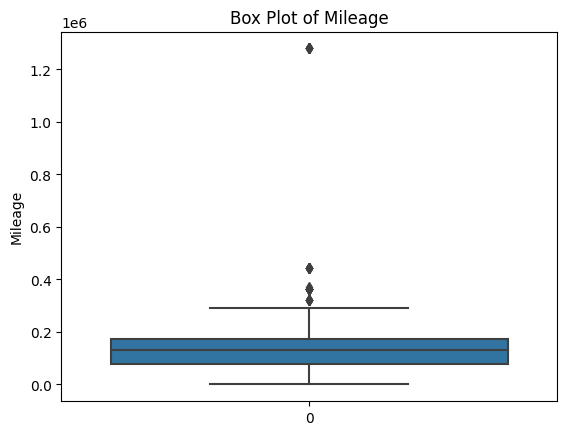

In [17]:
sns.boxplot(df['mileage'])
plt.title("Box Plot of Mileage")
plt.ylabel("Mileage")

In [18]:
# removing the outliers in mileage column
drop_mileage = [df['mileage'].min(),df['mileage'].max()]
df = df[~df['mileage'].isin(drop_mileage)]

Text(0, 0.5, 'Mileage')

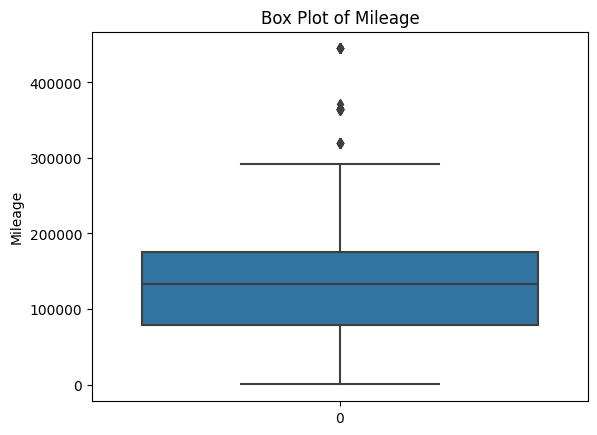

In [19]:
# after removing the outliers
sns.boxplot(df['mileage'])
plt.title("Box Plot of Mileage")
plt.ylabel("Mileage")

Text(0, 0.5, 'list_price')

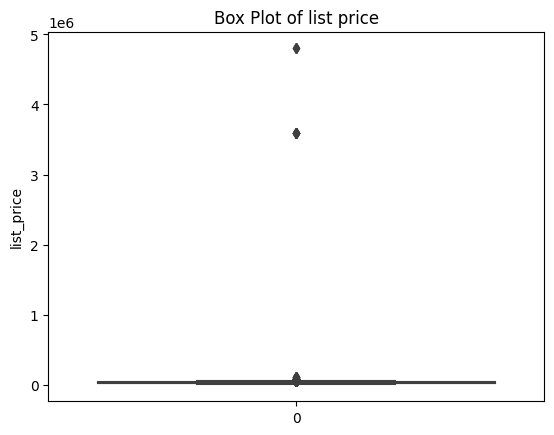

In [20]:
sns.boxplot(df['list_price'])
plt.title("Box Plot of list price")
plt.ylabel("list_price")

In [21]:
# removing the outliers in price column
drop_price1 = [df['list_price'].max()]
df = df[~df['list_price'].isin(drop_price1)]
drop_price2 = [df['list_price'].max()]
df = df[~df['list_price'].isin(drop_price2)]


Text(0, 0.5, 'list_price')

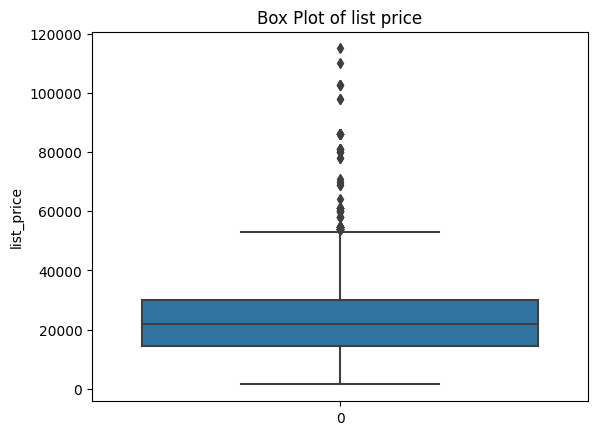

In [49]:
# after removing the outliers in price column
sns.boxplot(df['list_price'])
plt.title("Box Plot of list price")
plt.ylabel("list_price")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1902
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         1455 non-null   object
 1   model         1455 non-null   object
 2   model_year    1455 non-null   int32 
 3   list_price    1455 non-null   int32 
 4   color         1455 non-null   object
 5   body_type     1455 non-null   object
 6   wheel_config  1455 non-null   object
 7   transmission  1455 non-null   object
 8   fuel_type     1455 non-null   object
 9   mileage       1455 non-null   int32 
dtypes: int32(3), object(7)
memory usage: 140.3+ KB


## Exploratory Data Analysis (EDA)

In [24]:
df.head()

,brand,model,model_year,list_price,color,body_type,wheel_config,transmission,fuel_type,mileage
0,Hyundai,Santa Fe,2022,49990,White,SUV,All-wheel drive (AWD),Automatic,Other,5489
1,BMW,X3,2018,32980,Black,SUV,All-wheel drive (AWD),Automatic,Other,112079
2,GMC,Sierra 1500,2018,38990,Black,Pickup_Truck,4 x 4,Automatic,Gasoline,102122
3,Nissan,Rogue,2016,17895,White,SUV,All-wheel drive (AWD),Automatic,Other,140781
4,Ford,Other,2018,35988,Other,Van,Rear-wheel drive (RWD),Automatic,Gasoline,163000


### Brand 

In [25]:
Brand_data = df['brand'].value_counts().sort_values(ascending = False)
Brand_data

Honda            176
Ford             167
Mercedes-Benz    133
Toyota           119
BMW              103
Hyundai           93
Nissan            87
Dodge             80
Chevrolet         67
Kia               51
GMC               47
Cadillac          38
Ram               37
Volkswagen        33
Jeep              31
Mazda             26
Subaru            25
Acura             21
Lexus             20
Audi              16
Infiniti          12
Tesla             11
Smart             11
Land Rover        11
Other              8
Jaguar             7
Scion              6
Chrysler           5
Saab               4
Lincoln            3
Porsche            3
Mercedes-AMG       3
MINI               1
Name: brand, dtype: int64

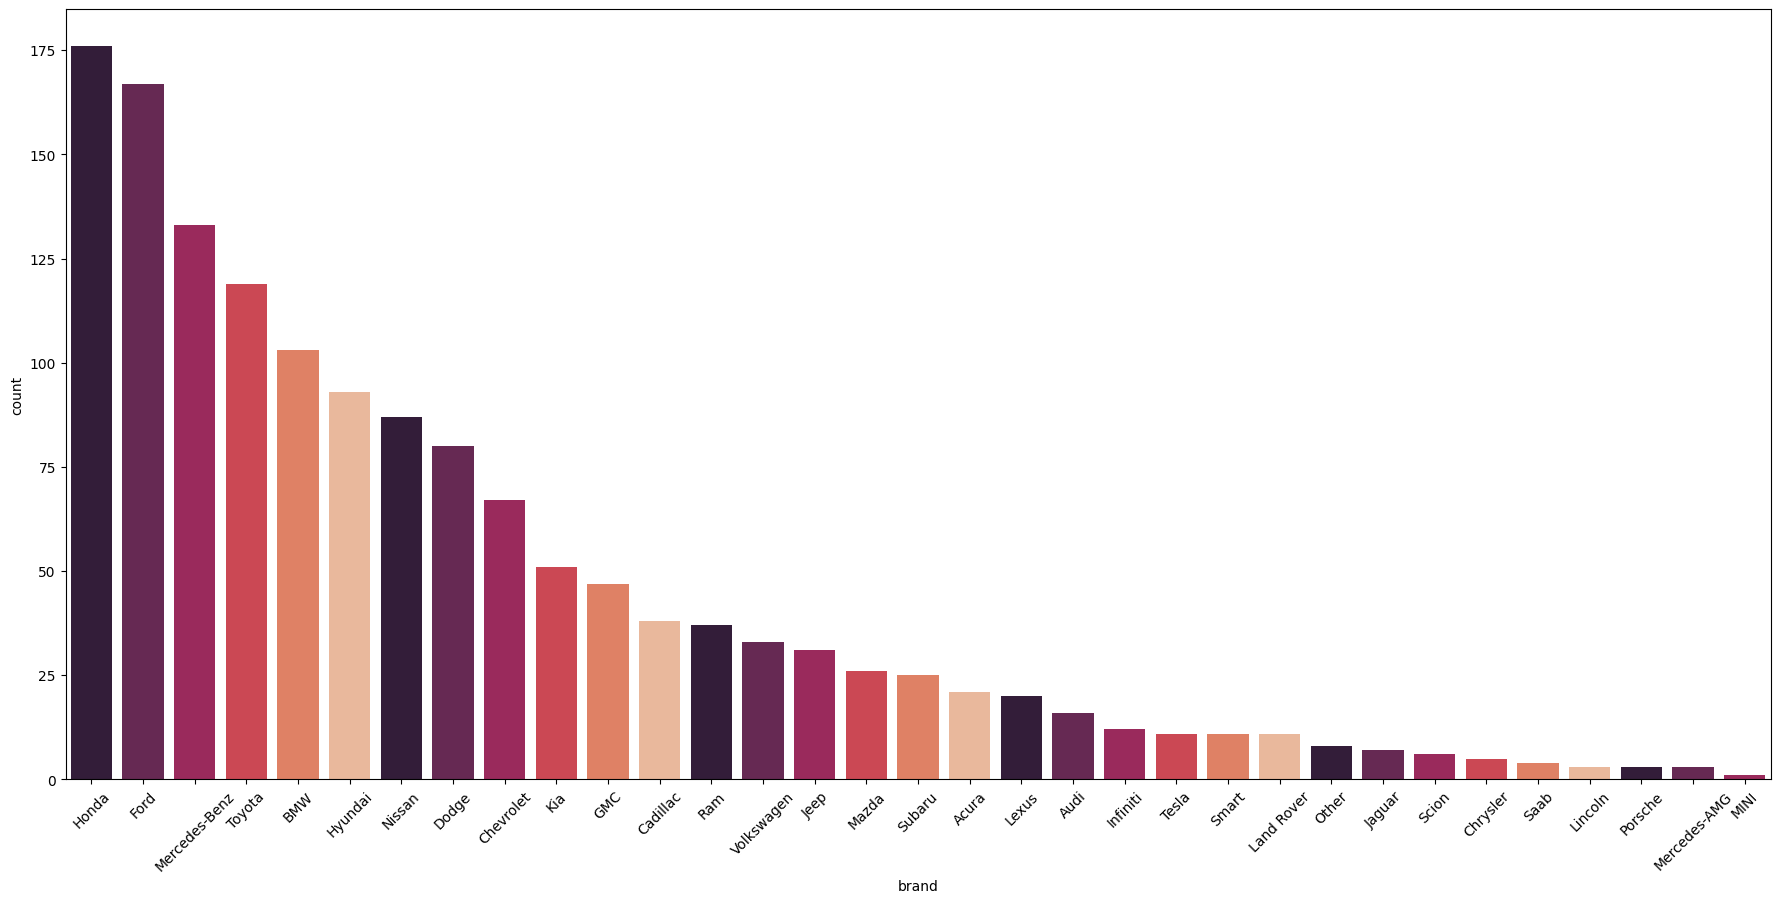

In [26]:
plt.figure(figsize = (22 ,10))
sns.countplot(data = df, x = 'brand',order = df['brand'].value_counts().index,palette = sns.color_palette('rocket'))
plt.xticks(rotation = 45)
plt.show()

### Model

In [27]:
Model_data = df['model'].value_counts().sort_values(ascending = False)
Model_data

Other             168
Civic              69
3-Series           47
Rogue              45
CR-V               39
                 ... 
911                 3
Mustang             3
Murano              3
X3                  3
Grand Cherokee      2
Name: model, Length: 96, dtype: int64

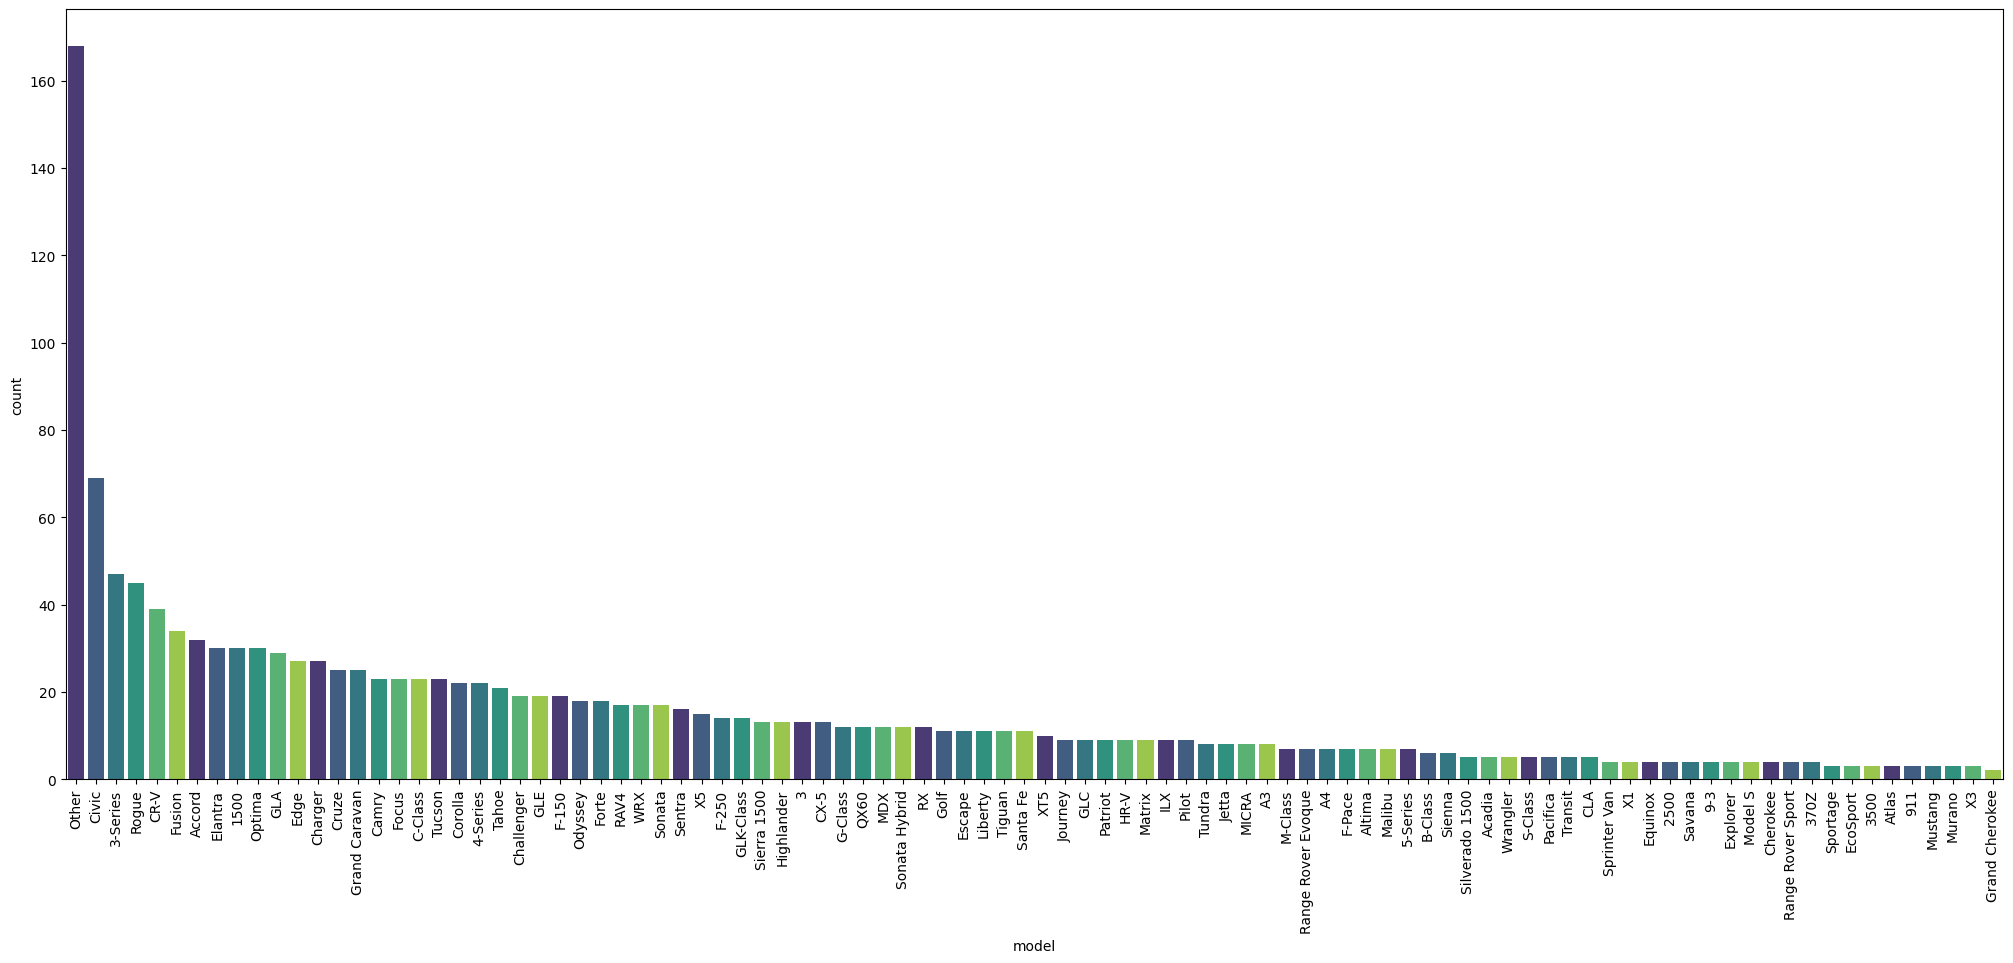

In [28]:
plt.figure(figsize = (25 ,10))
sns.countplot(data = df, x = 'model',order = df['model'].value_counts().index,palette = sns.color_palette('viridis'))
plt.xticks(rotation = 90)
plt.show()

### Model Year

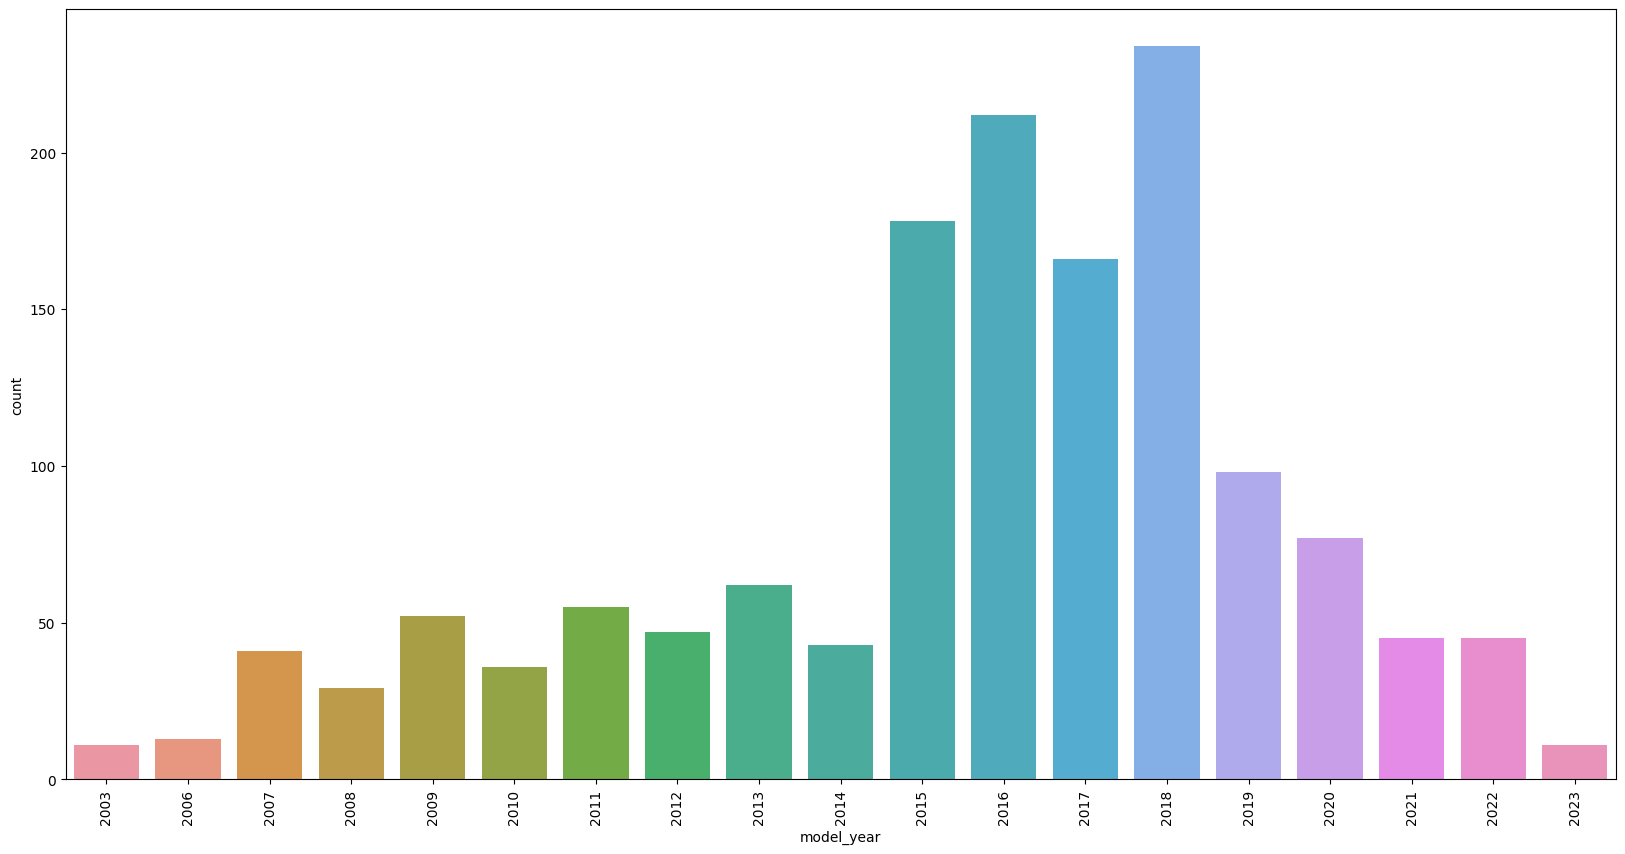

In [29]:
plt.figure(figsize = (20 ,10))
sns.countplot(data = df, x = 'model_year')
plt.xticks(rotation = 90)
plt.show()

### Color 

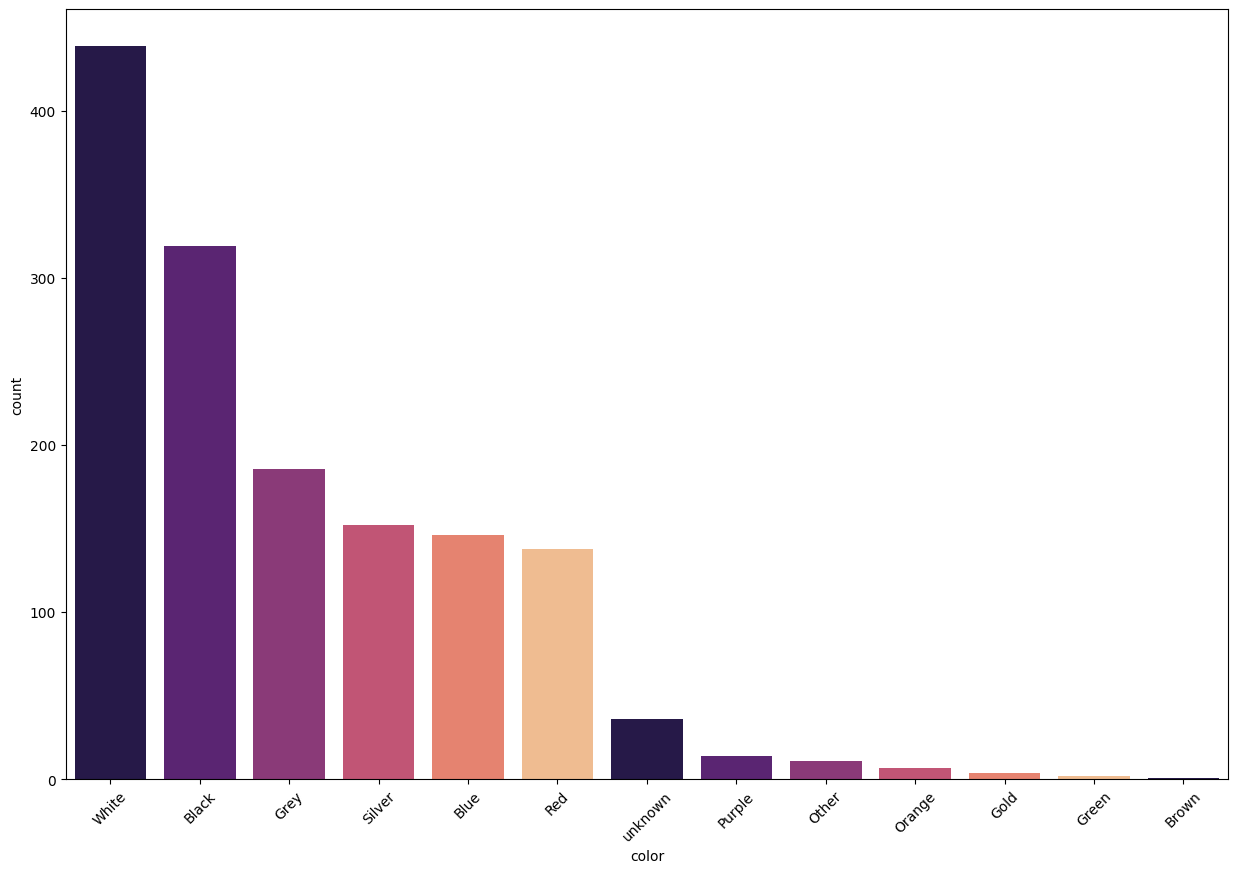

In [30]:
plt.figure(figsize = (15 ,10))
sns.countplot(data = df, x = 'color',order = df['color'].value_counts().index,palette = sns.color_palette('magma'))
plt.xticks(rotation = 45)
plt.show()

### Body Type

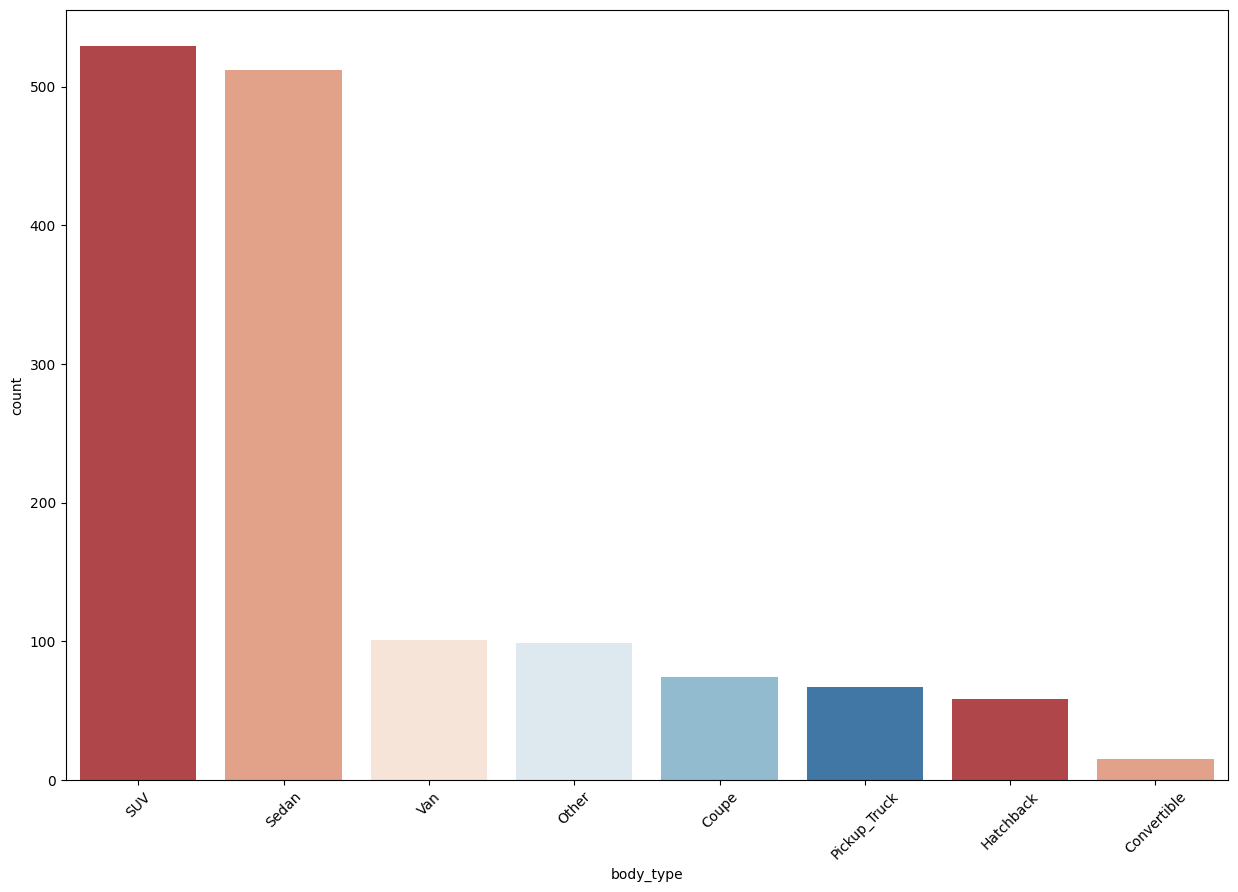

In [31]:
plt.figure(figsize = (15 ,10))
sns.countplot(data = df, x = 'body_type',order = df['body_type'].value_counts().index,palette = sns.color_palette('RdBu'))
plt.xticks(rotation = 45)
plt.show()

### Wheel Config

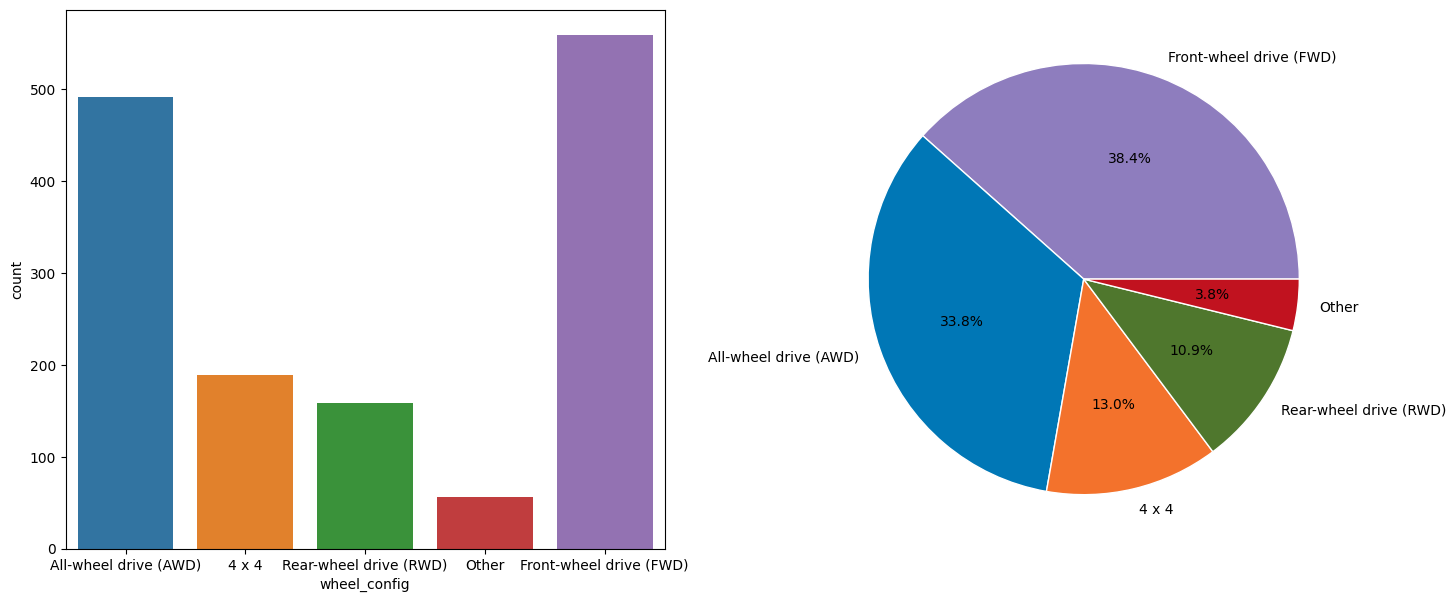

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (17, 7))
sns.countplot(data = df, x = 'wheel_config', ax = ax[0])
colors=['#8e7dbe','#0077b6','#f3722c','#4f772d','#c1121f']
ax[1].pie(df['wheel_config'].value_counts().values, labels = df['wheel_config'].value_counts().index, 
          autopct = '%1.1f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },colors=colors)
plt.show()

### Transmission 

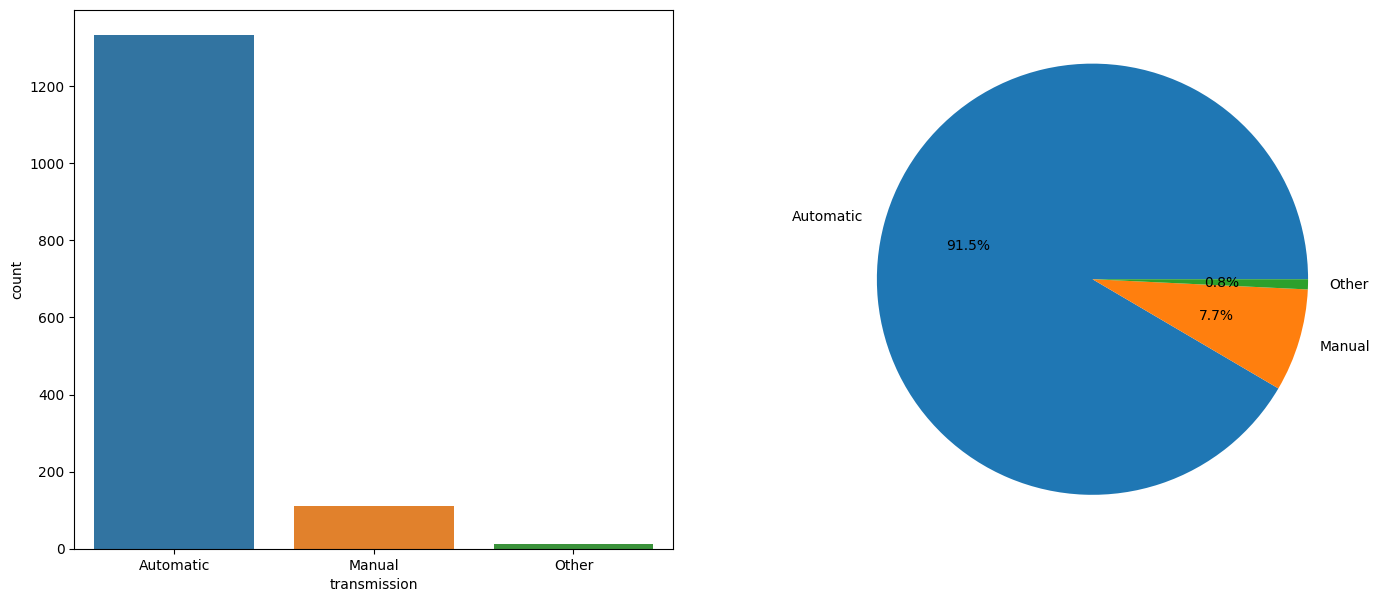

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (17, 7))
sns.countplot(data = df, x = 'transmission', ax = ax[0])
ax[1].pie(df['transmission'].value_counts().values, labels = df['transmission'].value_counts().index, 
          autopct = '%1.1f%%')
sns.color_palette("viridis", as_cmap=True)
plt.show()

### Fuel type

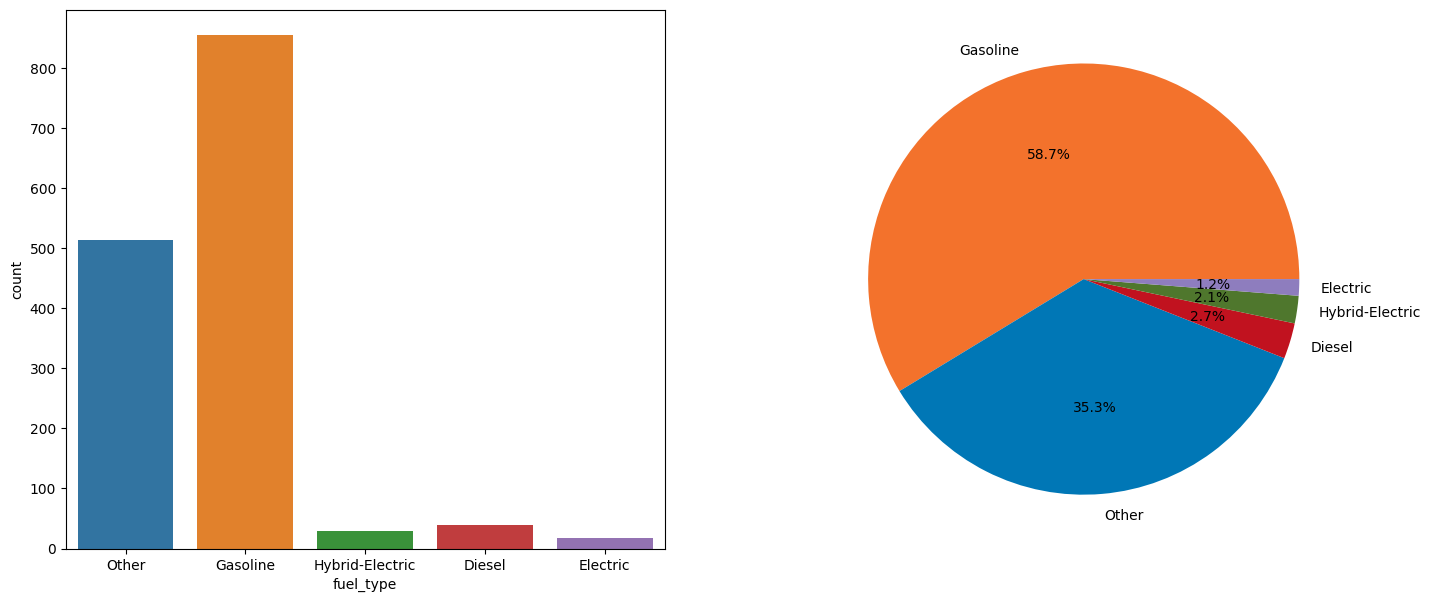

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (17, 7))
sns.countplot(data = df, x = 'fuel_type', ax = ax[0])
# colors=['#8e7dbe','#0077b6','#f3722c','#4f772d','#c1121f']
colors=['#f3722c','#0077b6','#c1121f','#4f772d','#8e7dbe']
ax[1].pie(df['fuel_type'].value_counts().values, labels = df['fuel_type'].value_counts().index, 
          autopct = '%1.1f%%',colors=colors)
sns.color_palette("viridis", as_cmap=True)
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_10660\3229843370.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


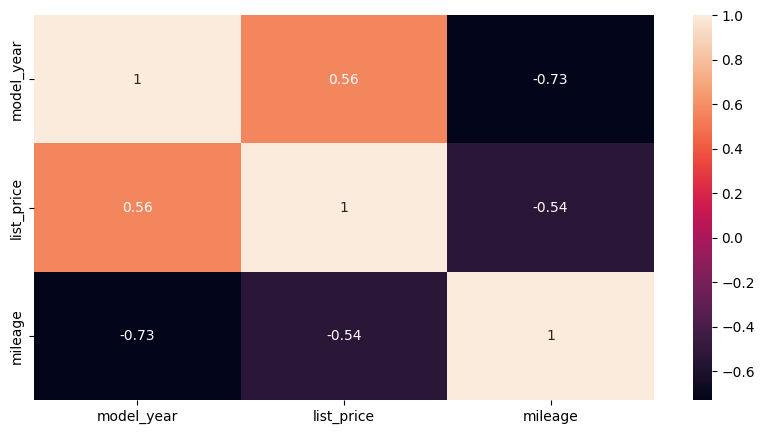

In [35]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Year & Price

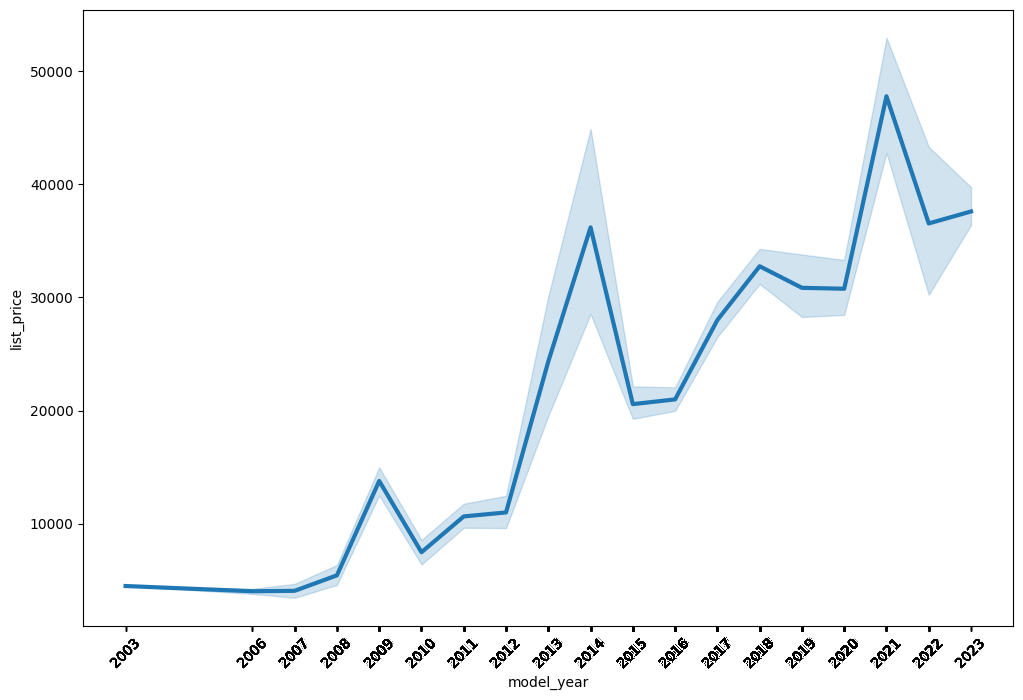

In [36]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = df, x = 'model_year', y = 'list_price', linewidth = 3)
plt.xticks(df['model_year'], rotation=45)
plt.show()

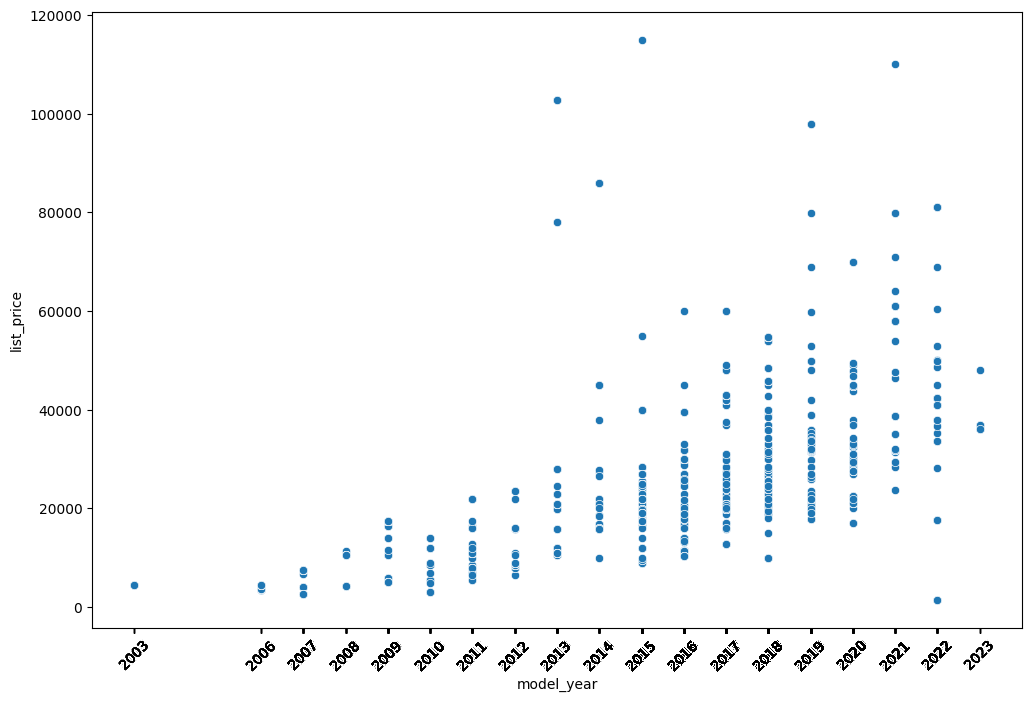

In [37]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'model_year', y = 'list_price')
plt.xticks(df['model_year'], rotation=45)
plt.show()

#### There is a positive relationship between the price of the car and the year of the car, as the price of the car increases every year.

### Mileage & Price

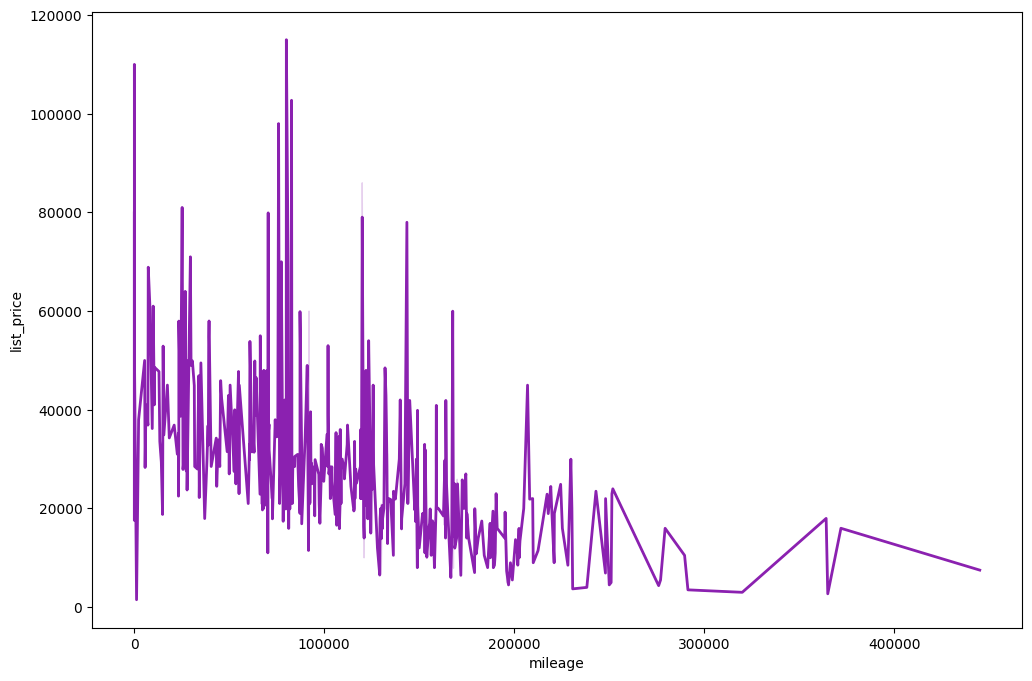

In [38]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = df, x = 'mileage', y = 'list_price', linewidth = 2,color = '#8b21b0')
plt.show()

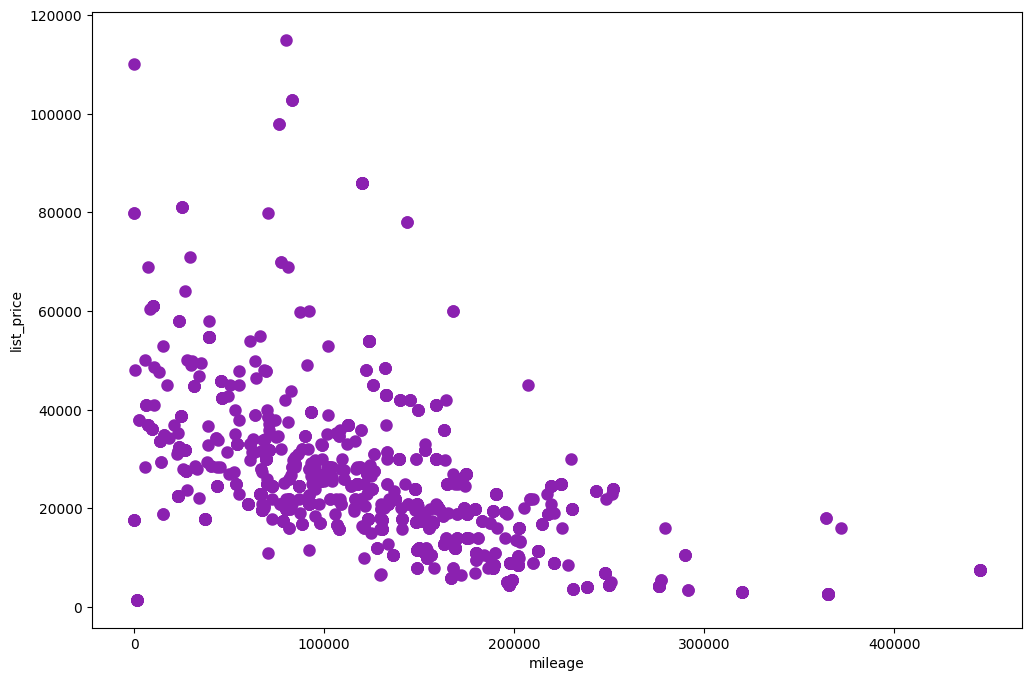

In [39]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'mileage', y = 'list_price', linewidth = 3, color = '#8b21b0', edgecolor = "#8b21b0")
plt.show()

#### The price of an car tends to fall as the mileage of the vehicle increases since there is a negative relationship between the two. This is due to the fact that increased mileage denotes increased driving, which can result in increased wear and tear on the engine, gearbox, and other components.

### Fuel Type & Price

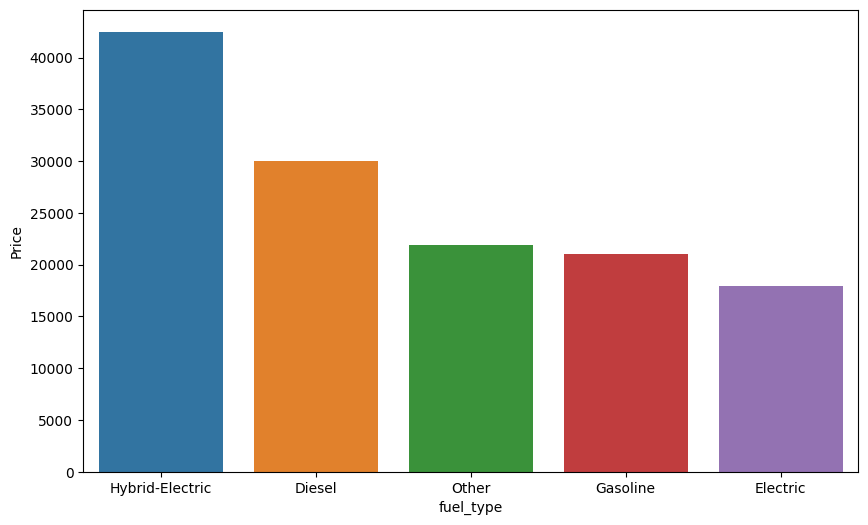

In [40]:
data_fueltype_price = df.groupby('fuel_type')['list_price'].median().sort_values(ascending = False)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_fueltype_price.index, y = data_fueltype_price.values)
ax.set_ylabel("Price")
plt.show()

#### The cars that use fuel-type Hybrid-Electic have higher prices.

## Data Pre-processing

### 1. Splitting the numerical and categorical features

In [41]:
# Splitting the data to Numerical Features and Categorical Features
num_features = list(df.select_dtypes('number'))
num_features.remove('list_price')

nom_features = list(df.select_dtypes('object'))

print(f'The Numerical Features: {num_features}')
print(f'The Nominal Features: {nom_features}')

The Numerical Features: ['model_year', 'mileage']
The Nominal Features: ['brand', 'model', 'color', 'body_type', 'wheel_config', 'transmission', 'fuel_type']


### 2. Splitting the dataframe into train and test

In [42]:
from sklearn.model_selection import train_test_split

# taking a copy from data
df_modeling = df.copy()

X = df_modeling.drop('list_price', axis = 1)
y = df_modeling['list_price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 1)

In [43]:
X_test[X_test['color'] == "['Brown']"]

,brand,model,model_year,color,body_type,wheel_config,transmission,fuel_type,mileage


## Transformation 

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

# numerical pipeline
num_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'median'),
                             StandardScaler()
                            )
# nominal pipeline
nom_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'most_frequent'),
                             OneHotEncoder(handle_unknown='ignore')
                            )

# Combine the numerical pipeline, nominal pipeline in one Pipeline 
preprocessor = ColumnTransformer([
                                  ('numerical', num_pipeline, num_features), 
                                  ('nominal', nom_pipeline, nom_features)
                                ])
    
# Fitting the training data               
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['model_year', 'mileage']),
                                ('nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['brand', 'model', 'color', 'body_type',
                                  'wheel_config', 'transmission',
                                  'fuel_type'])])

## Data Transformation & Model building

In [45]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,oob_score = True, random_state=1)
 
# fit the regressor with x and y data
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor(oob_score=True, random_state=1)

In [47]:
oob_score = regressor.oob_score_
print(f'Validation Accuracy of Random forest Regression: {round(oob_score * 100, 2)} %')


Validation Accuracy of Random forest Regression: 91.46 %
